In [23]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage


In [24]:
# Load dataset
df = pd.read_csv("country_data.csv")

# Shape of dataset
print("Dataset Shape:", df.shape)

# First 5 rows
df.head()


Dataset Shape: (167, 10)


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [25]:
# Dataset info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [26]:
# Statistical summary
df.describe()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [27]:
# Drop country column
df_cluster1 = df.drop('country', axis=1)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cluster1)


In [28]:
# Apply KMeans with 6 clusters
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(scaled_data)

# Assign cluster labels
df['KMeans_Cluster'] = kmeans.labels_

df.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,5


In [29]:
inertia = []

for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)


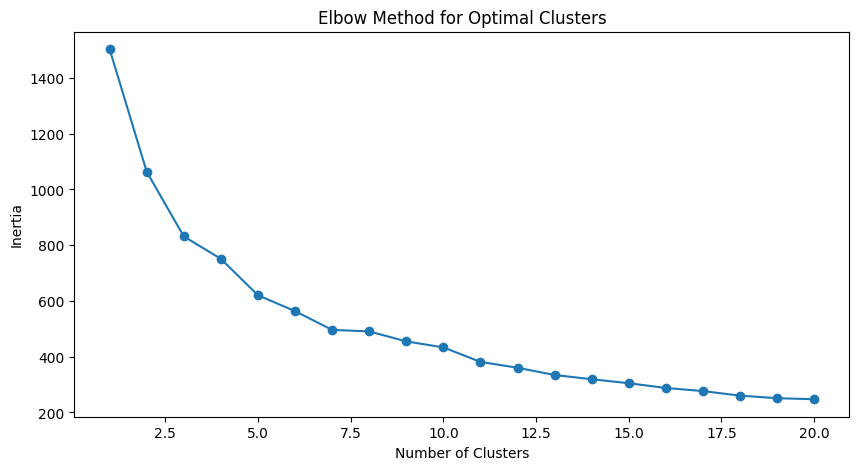

In [30]:
# Plot Elbow Curve
plt.figure(figsize=(10,5))
plt.plot(range(1, 21), inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal Clusters")
plt.show()


In [31]:
# Agglomerative Clustering with 6 clusters
hc = AgglomerativeClustering(
    n_clusters=6,
    metric='cosine',
    linkage='complete'
)

df['Hierarchical_Cluster'] = hc.fit_predict(scaled_data)

df.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Cluster,Hierarchical_Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2,4
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2,5
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,5,0


In [32]:
# Mean values per KMeans cluster
# Mean values per KMeans cluster (numeric columns only to avoid object dtype errors)
df.groupby('KMeans_Cluster').mean(numeric_only=True).round(2)


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Hierarchical_Cluster
KMeans_Cluster,,,,,,,,,,
0,26.32,33.84,6.34,43.13,9619.39,8.89,71.37,2.48,4755.33,1.85
1,4.50,38.96,10.19,35.52,43713.04,1.78,80.85,1.81,46356.52,1.91
2,95.26,28.68,6.27,43.23,3305.65,9.98,59.13,5.10,1625.40,4.19
3,130.00,25.30,5.07,17.40,5150.00,104.00,60.50,5.84,2330.00,5.00
4,4.13,176.00,6.79,156.67,64033.33,2.47,81.43,1.38,57566.67,2.67
5,10.05,62.87,6.14,58.74,28499.68,4.24,76.29,1.86,17420.65,1.13


In [34]:
# Mean values per Hierarchical cluster
df.groupby('Hierarchical_Cluster').mean(numeric_only=True).round(2)


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Cluster
Hierarchical_Cluster,,,,,,,,,,
0,13.92,43.08,5.57,46.04,26309.39,5.12,75.55,1.96,14845.45,2.76
1,28.34,26.20,5.70,25.14,11526.52,11.46,72.64,2.35,5669.91,0.00
2,6.36,46.21,10.41,48.02,35512.50,1.97,79.18,1.79,38339.69,1.44
3,16.77,73.84,6.11,77.28,16200.00,5.33,74.07,2.12,8934.76,2.52
4,83.99,27.79,6.51,46.34,2999.41,6.81,59.63,4.68,1467.74,1.52
5,71.73,44.45,5.18,36.82,9605.83,31.58,65.56,4.72,5224.17,1.58


In [35]:
# Filter poorest cluster (example: cluster 0)
df[df['KMeans_Cluster'] == 0][['country', 'gdpp', 'income', 'child_mort']]


,country,gdpp,income,child_mort
1,Albania,4090,9930,16.6
2,Algeria,4460,12900,27.3
5,Argentina,10300,18700,14.5
6,Armenia,3220,6700,18.1
9,Azerbaijan,5840,16000,39.2
...,...,...,...,...
156,Ukraine,2970,7820,11.7
160,Uruguay,11900,17100,10.6
161,Uzbekistan,1380,4240,36.3
162,Vanuatu,2970,2950,29.2
